In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import sqlite3
import numpy as np

In [61]:
# Settings
SEED = 42
SAMPLE_SIZE = None
PATH_CSV = './top_3827348_songs.csv'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
def to_str(x):
    return x[2:-1]

def to_list(x):
    return [y for y in to_str(x).split(',')]

df_complete = pd.read_csv(
    PATH_CSV,
    converters={
        'id': to_str, 'name': to_str, 'duration': np.int32, 'explicit': np.int32,
        'popularity': np.int32, 'loudness': np.float32, 'tempo': np.float32,
        'time_signature': np.int32, 'key': np.int32, 'mode': np.int32, 'acousticness': np.float32,
        'danceability': np.float32, 'energy': np.float32, 'instrumentalness': np.float32,
        'liveness': np.float32, 'speechiness': np.float32, 'valence': np.float32,
        'artist_ids': to_list, 'artist_names': to_list, 'artist_followers': to_list,
        'artist_popularities': to_list, 'album_ids': to_list, 'album_names': to_list,
        'album_types': to_list, 'album_release_dates': to_list, 'album_popularities': to_list,
        'genres': to_list
    }
)
df_complete.head()

,id,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,artist_ids,artist_names,artist_followers,artist_popularities,album_ids,album_names,album_types,album_release_dates,album_popularities,genres
0,0000gBWfr2zIFzE5tDzxca,Sella Stercoraria,507987,0,3,-8.065,80.509003,4,9,0,0.000013,0.322,0.670,0.559000,0.3510,0.0449,0.176,[0Tgtl5beIMahbtIzV5jBXw],[Rattenf\xc3\xa4nger],[950],[7],[1HyOZ6YUbaWNdnPjo9UOUE],[Geisslerlieder],[album],[1575590400000],[8],[ukrainian metal]
1,0003Z98F6hUq7XxqSRM87H,\xd0\x9c\xd0\xb5\xd0\xbd\xd1\x8f \xd0\xb1\xd0\xbe\xd0\xbb\xd1\x8c\xd1\x88\xd0\xb5 \xd1\x82\xd1\x83\xd1\x82 \xd0\xbd\xd0\xb5\xd1\x82,241666,1,18,-5.408,138.076004,4,1,1,0.086000,0.733,0.711,0.000000,0.4510,0.1580,0.346,[08RxfNkJpjJ4dJb4xASWzj],[Jacques Anthony],[0],[0],[0003Z98F6hUq7XxqSRM87H],[#NoName],[album],[1436400000000],[17],"[russian hip hop, russian trap]"
2,0003q2V7hAiIYyzXV4sNyQ,"Das wilde Pack, Teil 1: Das wilde Pack, Kapitel 5",200974,0,11,-14.880,79.250000,3,0,1,0.500000,0.520,0.416,0.000000,0.5950,0.9540,0.538,[7vYT04Nb7z9QUTf4F8oG2c],[Das wilde Pack],[3090],[24],[7uwWybYhEK3rhg6QDJo9Rw],[Teil 1: Das wilde Pack],[album],[1225238400000],[21],[kleine hoerspiel]
3,000490QTLqT1ftnfwj3kGF,Disco Guitar,73195,0,2,-14.496,157.445007,4,1,1,0.665000,0.742,0.661,0.000052,0.3070,0.1180,0.922,[0cKrM2XKF7wxyfEQDauvyQ],[DJ Godfather],[0],[0],[1sDqcoOS1JuKSFHNkcU4jL],[Da Bomb Vol 1],[album],[975974400000],[10],"[electro, ghettotech]"
4,00053lDuLvN8Q8voGT3GCt,Soki,279880,0,1,-5.135,104.961998,4,7,1,0.673000,0.622,0.734,0.000002,0.0954,0.0476,0.481,[6HAIuUS4d8W4zjDTl6rsaU],[Barbara Kanam],[0],[0],[6XAXAPWJCpXmracdcF30Jr],[Karibu],[album],[1230768000000],[14],[makossa]


In [62]:
if SAMPLE_SIZE is not None:
    df = df_complete.sample(n=SAMPLE_SIZE, random_state=SEED).copy()
else:
    df = df_complete.copy()

In [63]:
df = df.set_index('id')
df = df[df['artist_names'].apply(lambda x: 'Taylor Swift' in x)]
df = df.sort_values(by='popularity', ascending=False)
print(len(df))
df.head()

478


,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,artist_ids,artist_names,artist_followers,artist_popularities,album_ids,album_names,album_types,album_release_dates,album_popularities,genres
id,,,,,,,,,,,,,,,,,,,,,,,,,,
0lx2cLdOt3piJbcaXIV74f,willow,214706,0,86,-9.195,81.112000,4,7,1,0.83300,0.392,0.574,0.001790,0.1450,0.1700,0.529,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2Xoteh7uEpea4TohMxjtaq],[evermore],[album],[1607644800000],[89],"[pop, post-teen pop]"
4R2kfaDFhslZEMJqAFNpdd,cardigan,239560,0,84,-8.588,130.033005,4,0,0,0.53700,0.613,0.581,0.000345,0.2500,0.0424,0.551,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2fenSS68JI1h4Fo296JfGr],[folklore],[album],[1595548800000],[89],"[pop, post-teen pop]"
0sY6ZUTh4yoctD8VIXz339,champagne problems,244000,1,82,-12.077,171.319000,4,0,1,0.92000,0.462,0.240,0.000000,0.1130,0.0377,0.320,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2Xoteh7uEpea4TohMxjtaq],[evermore],[album],[1607644800000],[89],"[pop, post-teen pop]"
4pvb0WLRcMtbPGmtejJJ6y,exile (feat. Bon Iver),285634,0,82,-8.426,75.601997,4,6,1,0.77800,0.298,0.380,0.000056,0.1100,0.0287,0.152,"[06HL4z0CvFAxyc27GXpf02, 4LEiUm1SRbFMgfqnQTwUbQ]","[Taylor Swift, Bon Iver]","[38455481, 2951666]","[97, 80]",[2fenSS68JI1h4Fo296JfGr],[folklore],[album],[1595548800000],[89],"[pop, post-teen pop, eau claire indie, indie folk, melancholia]"
6RRNNciQGZEXnqk8SQ9yv5,You Need To Calm Down,171360,0,81,-5.617,85.026001,4,2,1,0.00929,0.771,0.671,0.000000,0.0637,0.0553,0.714,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[1NAmidJlEaVgA3MpcPFYGq],[Lover],[album],[1566518400000],[89],"[pop, post-teen pop]"


In [64]:
desired_albums = ['evermore', '1989', 'Red', 'Fearless', 'folklore']

In [65]:
artist_df = df[df['album_names'].apply(lambda x: any(item in x for item in desired_albums))].copy()
artist_df = artist_df.reset_index(drop=True)
artist_df.head()

,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,artist_ids,artist_names,artist_followers,artist_popularities,album_ids,album_names,album_types,album_release_dates,album_popularities,genres
0,willow,214706,0,86,-9.195,81.112000,4,7,1,0.833,0.392,0.574,0.001790,0.145,0.1700,0.529,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2Xoteh7uEpea4TohMxjtaq],[evermore],[album],[1607644800000],[89],"[pop, post-teen pop]"
1,cardigan,239560,0,84,-8.588,130.033005,4,0,0,0.537,0.613,0.581,0.000345,0.250,0.0424,0.551,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2fenSS68JI1h4Fo296JfGr],[folklore],[album],[1595548800000],[89],"[pop, post-teen pop]"
2,champagne problems,244000,1,82,-12.077,171.319000,4,0,1,0.920,0.462,0.240,0.000000,0.113,0.0377,0.320,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2Xoteh7uEpea4TohMxjtaq],[evermore],[album],[1607644800000],[89],"[pop, post-teen pop]"
3,exile (feat. Bon Iver),285634,0,82,-8.426,75.601997,4,6,1,0.778,0.298,0.380,0.000056,0.110,0.0287,0.152,"[06HL4z0CvFAxyc27GXpf02, 4LEiUm1SRbFMgfqnQTwUbQ]","[Taylor Swift, Bon Iver]","[38455481, 2951666]","[97, 80]",[2fenSS68JI1h4Fo296JfGr],[folklore],[album],[1595548800000],[89],"[pop, post-teen pop, eau claire indie, indie folk, melancholia]"
4,willow,214706,0,79,-9.195,80.960999,4,7,1,0.835,0.392,0.579,0.001790,0.145,0.1640,0.549,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[5jmVg7rwRcgd6ARPAeYNSm],[evermore],[album],[1607558400000],[77],"[pop, post-teen pop]"


In [66]:
print(artist_df.columns)
selected_cols = ['duration', 'explicit', 'loudness', 'tempo', 'time_signature', 'key', 'mode', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
scaler = StandardScaler()
X_selected = scaler.fit_transform(artist_df[selected_cols])

Index(['name', 'duration', 'explicit', 'popularity', 'loudness', 'tempo',
       'time_signature', 'key', 'mode', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence',
       'artist_ids', 'artist_names', 'artist_followers', 'artist_popularities',
       'album_ids', 'album_names', 'album_types', 'album_release_dates',
       'album_popularities', 'genres'],
      dtype='object')


In [67]:
pca_artist = PCA(n_components=2, random_state=SEED).fit(X_selected)
round(
    pd.DataFrame(
        pca_artist.components_.T,
        index=selected_cols,
        columns=['PCA1', 'PCA2']
    ),
    3
)

,PCA1,PCA2
duration,0.281,-0.357
explicit,0.187,0.142
loudness,-0.420,-0.262
tempo,-0.055,0.322
time_signature,0.096,0.349
key,-0.066,0.226
mode,0.076,0.081
acousticness,0.426,0.306
danceability,-0.326,0.022
energy,-0.463,-0.001


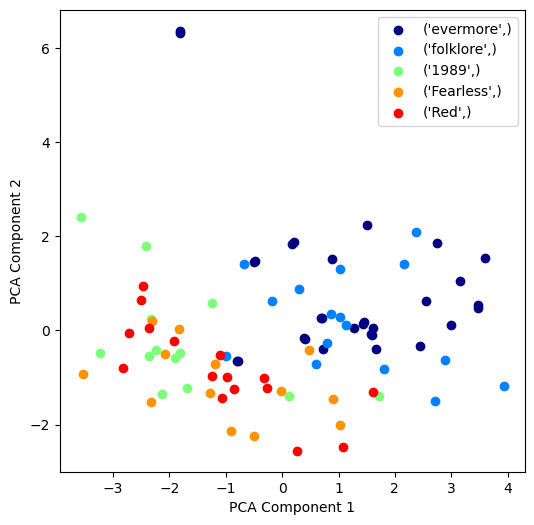

In [68]:
X_artist_pca = pca_artist.transform(X_selected)

# Your list of desired albums
desired_albums = ['evermore', '1989', 'Red', 'Fearless', 'folklore']

# Filter the data based on desired albums
filtered_df = artist_df
album_names = filtered_df['album_names'].apply(tuple).unique()

# Set up colors for each album
colors = plt.cm.jet(np.linspace(0, 1, len(album_names)))

fig, ax = plt.subplots(figsize=(6, 6))

# Iterate through each album to plot points with corresponding color
for album, color in zip(album_names, colors):
    album_indices = filtered_df[filtered_df['album_names'].apply(tuple) == album].index
    if album == ('Red',): # For fun
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c='red', label=album)
    else:
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c=[color], label=album)

# Add labels and legend
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.legend()

'''
# Add text annotations
for i in range(X_selected.shape[0]):
    plt.text(
        x=X_artist_pca[i, 0] + 0.1,
        y=X_artist_pca[i, 1] + 0.1,
        s=artist_df['album_names'].iloc[i],
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
'''
plt.show()

[t-SNE] Computing 87 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.002s...
[t-SNE] Computed neighbors for 88 samples in 0.213s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 2.246471
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.425327
[t-SNE] KL divergence after 900 iterations: 0.232766


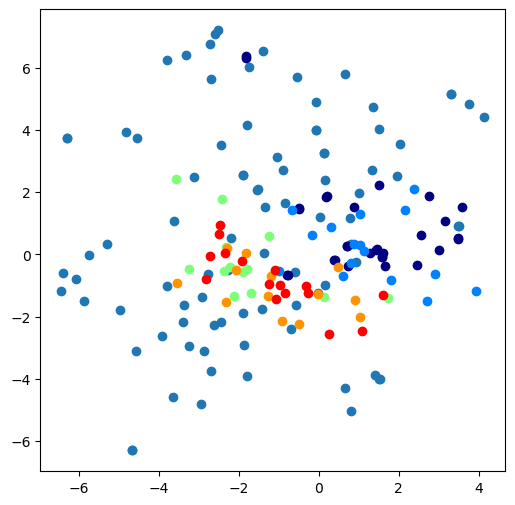

In [70]:
tsne = TSNE(verbose=1, random_state=SEED)
tsne_results = tsne.fit_transform(X_selected)
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(tsne_results[:, 0], y=tsne_results[:, 1])
for album, color in zip(album_names, colors):
    album_indices = filtered_df[filtered_df['album_names'].apply(tuple) == album].index
    if album == ('Red',): # For fun
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c='red', label=album)
    else:
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c=[color], label=album)
'''
for i in range(tsne_results.shape[0]):
    plt.text(
        x=tsne_results[i, 0] + 0.3,
        y=tsne_results[i, 1] + 0.3,
        s=artist_df['album_names'][i],
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
'''
plt.show()